# Question 3

In [1]:
# Import relevant packages
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
import sys

In [3]:
# Lets create our model in graph view
model = BayesianModel([("Smoking","Yellow_Fingers"),("Smoking","Cancer"),("Smoking","Weakness"),("Solar_Flare","Radiation"),("Microvawe","Radiation"),("Radiation","Cancer")])

In [4]:
model.nodes()

NodeView(('Smoking', 'Yellow_Fingers', 'Cancer', 'Weakness', 'Solar_Flare', 'Radiation', 'Microvawe'))

In [5]:
model.edges()

OutEdgeView([('Smoking', 'Yellow_Fingers'), ('Smoking', 'Cancer'), ('Smoking', 'Weakness'), ('Solar_Flare', 'Radiation'), ('Radiation', 'Cancer'), ('Microvawe', 'Radiation')])

In [24]:
# Prior probability for Smoking P(S)
cpd_S = TabularCPD(variable='Smoking', variable_card=2, values=[[0.85], [0.15]])

# Prior probability for Solar_Flare P(F)
cpd_F = TabularCPD(variable='Solar_Flare', variable_card=2, values=[[0.99], [0.01]])

# Prior probability for Microvawe P(M)
cpd_M = TabularCPD(variable='Microvawe', variable_card=2, values=[[0.05], [0.95]])

In [25]:
# Conditional probability for Weakness or P(W| S)
cpd_W = TabularCPD(variable='Weakness',variable_card=2, values = [[0.8,0.1],
                                    [0.2,0.9]],
                                  evidence = ['Smoking'],
                                  evidence_card=[2])

# Conditional probability for Radiation  or P(R|F,M)
cpd_R = TabularCPD(variable='Radiation', variable_card=2, values = [[0.9, 0.8, 0.8, 0.1],
                                  [0.1, 0.2, 0.2, 0.9]],
                                  evidence = ['Solar_Flare',"Microvawe"],
                                  evidence_card=[2,2])

# Conditional probability for Cancer  or P(C|S,R)
cpd_C = TabularCPD(variable='Cancer', variable_card=2, values = [[0.9, 0.4, 0.7, 0.1],
                                  [0.1, 0.6, 0.3, 0.9]],
                                  evidence = ['Smoking',"Radiation"],
                                  evidence_card=[2,2])

# Conditional probability for Yellow_Fingers or P(Y|S)
cpd_Y = TabularCPD(variable='Yellow_Fingers', variable_card=2, values = [[0.89, 0.2],
                                    [0.11, 0.8]],
                                  evidence = ['Smoking'],
                                  evidence_card=[2])


In [26]:
model.add_cpds(cpd_S, cpd_F, cpd_M, cpd_W, cpd_R, cpd_C, cpd_Y)

In [27]:
print(model.check_model())

True


In [32]:
cpds = model.get_cpds()
for cpd in cpds:
    print(cpd)

+------------+------+
| Smoking(0) | 0.85 |
+------------+------+
| Smoking(1) | 0.15 |
+------------+------+
+----------------+------+
| Solar_Flare(0) | 0.99 |
+----------------+------+
| Solar_Flare(1) | 0.01 |
+----------------+------+
+--------------+------+
| Microvawe(0) | 0.05 |
+--------------+------+
| Microvawe(1) | 0.95 |
+--------------+------+
+-------------+------------+------------+
| Smoking     | Smoking(0) | Smoking(1) |
+-------------+------------+------------+
| Weakness(0) | 0.8        | 0.1        |
+-------------+------------+------------+
| Weakness(1) | 0.2        | 0.9        |
+-------------+------------+------------+
+--------------+----------------+----------------+----------------+----------------+
| Solar_Flare  | Solar_Flare(0) | Solar_Flare(0) | Solar_Flare(1) | Solar_Flare(1) |
+--------------+----------------+----------------+----------------+----------------+
| Microvawe    | Microvawe(0)   | Microvawe(1)   | Microvawe(0)   | Microvawe(1)   |
+-----

## What is the probability of cancer given weakness = 1?

In [30]:
from pgmpy.inference import VariableElimination

# Going to do variable elimination
infer = VariableElimination(model)


# Compute probability of Cancer given only Weakness
phi_query = infer.query(['Cancer'], evidence={'Weakness':1}, joint = False)
factor = phi_query['Cancer']
print('Probability of Cancer given Weakness')
print(factor)


Eliminating: Smoking: 100%|██████████| 5/5 [00:00<00:00, 836.12it/s]Probability of Cancer given Weakness
+-----------+---------------+
| Cancer    |   phi(Cancer) |
+===========+===============+
| Cancer(0) |        0.7017 |
+-----------+---------------+
| Cancer(1) |        0.2983 |
+-----------+---------------+



## What is the probability of smoking given cancer=1?

In [33]:
# Compute probability of Smoking given only Cancer
phi_query = infer.query(['Smoking'], evidence={'Cancer':1}, joint = False)
factor = phi_query['Smoking']
print('Probability of Smoking given Cancer')
print(factor)

Eliminating: Radiation: 100%|██████████| 5/5 [00:00<00:00, 716.26it/s]Probability of Smoking given Cancer
+------------+----------------+
| Smoking    |   phi(Smoking) |
+============+================+
| Smoking(0) |         0.7300 |
+------------+----------------+
| Smoking(1) |         0.2700 |
+------------+----------------+



## What is the probability of cancer if you never use a microwave?

In [35]:
# Compute probability of Cancer given no Microwave
phi_query = infer.query(['Cancer'], evidence={'Microvawe':0}, joint = False)
factor = phi_query['Cancer']
print('Probability of Cancer given no Microvawe')
print(factor)

Eliminating: Radiation: 100%|██████████| 5/5 [00:00<00:00, 716.36it/s]Probability of Cancer given no Microvawe
+-----------+---------------+
| Cancer    |   phi(Cancer) |
+===========+===============+
| Cancer(0) |        0.8180 |
+-----------+---------------+
| Cancer(1) |        0.1820 |
+-----------+---------------+



# Question 4

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.datasets import cifar10

import cv2

import sys
import numpy as np
import csv
import math

import matplotlib.pyplot as plt


print(tf.__version__)
print(tf.keras.__version__)

2.4.0
2.4.0


## A

In [2]:
# A) Download the fashion_mnist dataset(you can use tf.keras.datasetsas covered in class)
mnist = tf.keras.datasets.fashion_mnist
# Load training data, labels; and testing data and their true labels
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize input between 0 and 1
# Very important
train_images = train_images / 255.0
test_images = test_images / 255.0
# Check shapes of train_images, train_labels etc
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)


In [3]:
# For printing, we name each of the 10 classes below
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
#class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

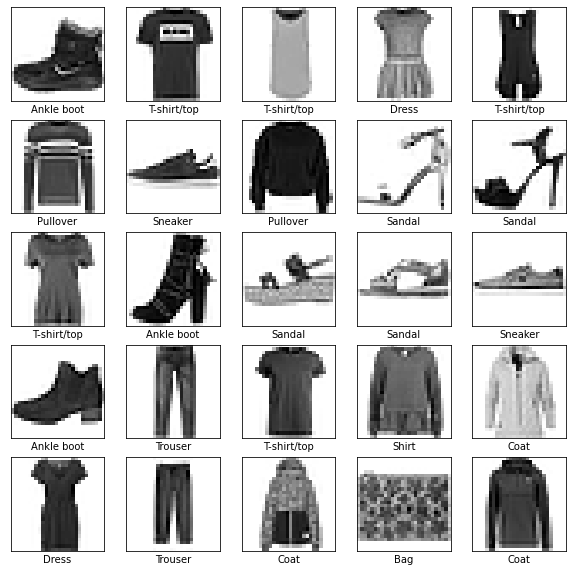

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))

# Show first 25 training images below
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## B/C

In [5]:
# b) Create an ANN with 1 input layer, atleast two hidden layer with atleast 10 nodes per layer. You can use relu or any other activation function for hidden layers.You are free to create additional hidden layers or increase the number of nodes tomaximize the final accuracy (it would require some trial and error)

model = tf.keras.Sequential()
model.add(layers.Flatten(input_shape=(28, 28))) 
model.add(layers.Dense(256, activation=tf.nn.relu))
model.add(layers.Dense(256, activation=tf.nn.relu)) 
model.add(layers.Dense(256, activation=tf.nn.relu))          
model.add(layers.Dense(128, activation=tf.nn.relu))     
model.add(layers.Dense(128, activation=tf.nn.relu))
model.add(layers.Dense(128, activation=tf.nn.relu))
model.add(layers.Dense(64, activation=tf.nn.relu))
model.add(layers.Dense(32, activation=tf.nn.relu))
# c)
model.add(layers.Dense(10, activation=tf.nn.softmax))

In [6]:
# Compile the model with appropriate Loss function. metrics is something you can monitor (but model does not optimize metrc)
model.compile(optimizer="Adam", 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Callbacks

In [8]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

In [9]:
# Stop and restore best weights for model if model doesnt not improve
early_stopping_monitor = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=5,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

In [10]:
# Save best model/weights
checkpoint_filepath = "C:/Users/monol/Saved_models"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    
    save_weights_only = False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=0)

## D

In [11]:
# d)
# Run the stochastic gradient descent for specified epochs
epochs = 50
hist = model.fit(train_images, train_labels,validation_split = 0.4, epochs=epochs, callbacks=[early_stopping_monitor,tensorboard_cb])

Epoch 1/50
1125/1125 [==============================] - 10s 8ms/step - loss: 0.8363 - accuracy: 0.6937 - val_loss: 0.4782 - val_accuracy: 0.8313
Epoch 2/50
1125/1125 [==============================] - 8s 7ms/step - loss: 0.4297 - accuracy: 0.8469 - val_loss: 0.3760 - val_accuracy: 0.8649
Epoch 3/50
1125/1125 [==============================] - 8s 7ms/step - loss: 0.3816 - accuracy: 0.8633 - val_loss: 0.4150 - val_accuracy: 0.8558
Epoch 4/50
1125/1125 [==============================] - 8s 7ms/step - loss: 0.3549 - accuracy: 0.8726 - val_loss: 0.3728 - val_accuracy: 0.8685
Epoch 5/50
1125/1125 [==============================] - 7s 6ms/step - loss: 0.3369 - accuracy: 0.8757 - val_loss: 0.3770 - val_accuracy: 0.8708
Epoch 6/50
1125/1125 [==============================] - 7s 6ms/step - loss: 0.3217 - accuracy: 0.8829 - val_loss: 0.3727 - val_accuracy: 0.8658
Epoch 7/50
1125/1125 [==============================] - 7s 6ms/step - loss: 0.3094 - accuracy: 0.8882 - val_loss: 0.3666 - val_accuracy

In [12]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 17976.

In [13]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # some random data
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # random 32×32 RGB images
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

## E

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', round(test_acc,4))

313/313 [==============================] - 0s 1ms/step - loss: 0.3754 - accuracy: 0.8819
Test accuracy: 0.8819


In [15]:
model.save("Ass_1_Question_4_model_88%.h5")

# Question 5

## Import Data

In [4]:
# Class names for different classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

# Load training data, labels; and testing data and their true labels
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print ('Training data seize:', train_images.shape, 'Test data size', test_images.shape)

# Normalize pixel values between -1 and 1
train_images = train_images / 127.5 - 1 
test_images = test_images / 127.5 - 1 

Training data seize: (50000, 32, 32, 3) Test data size (10000, 32, 32, 3)


## Viz Data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

[]

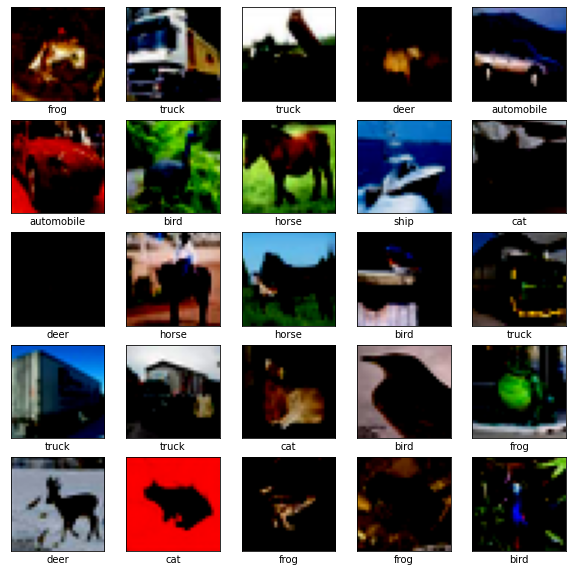

In [5]:
%matplotlib inline
#Show first 25 training images below
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.plot()

## Resize Images to use with MobileNet

In [6]:
# Upsize all training and testing images to 96x96 for use with mobile net
minSize = 96 #minimum size requried for mobileNetV2
# You may use cv2 package. Look for function:
#"cv2.resize(<originalImage>, dsize=(minSize, minSize), interpolation=cv2.INTER_AREA)"
# resize train image: You can first initialize a numpy array resized_train_images to store all the resized training images
resized_train_images = np.zeros((50000, minSize, minSize, 3), dtype=np.float32)
# <Write code for resizing>
 
# resize test image: You can first initialize a numpy array resized_test_images to store all the resized test images
resized_test_images = np.zeros((10000, minSize, minSize, 3), dtype=np.float32)
# <Write code for resizing>
for i in range(len(train_images)):
    resized_train_images[i] = cv2.resize(train_images[i], dsize=(minSize, minSize), interpolation=cv2.INTER_AREA)

for i in range(len(test_images)):
    resized_test_images[i] = cv2.resize(test_images[i], dsize=(minSize, minSize), interpolation=cv2.INTER_AREA)


In [19]:
# Check shapes of train_images, train_labels etc
print(resized_train_images.shape)
print(train_labels.shape)
print(resized_test_images.shape)

(50000, 96, 96, 3)
(50000, 1)
(10000, 96, 96, 3)


In [20]:
patience = 2
early_stopping_monitor = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=patience,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

## MobilenetV2 with Freeezed Layer and one Densed Layer

In [21]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

model = tf.keras.Sequential()    
mob = MobileNetV2(input_shape = (96,96,3), include_top=False)
model.add(mob)
model.add(layers.Flatten())
model.add(layers.Dense(units=64,activation="relu"))
model.add(layers.Dense(units=10, activation="softmax"))

In [22]:
# option to freeze layers
for layer in mob.layers[:]:
    layer.trainable = False

In [23]:
model.layers[0].trainable = False

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_96 (Functio (None, 3, 3, 1280)        2257984   
_________________________________________________________________
flatten_1 (Flatten)          (None, 11520)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                737344    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                650       
Total params: 2,995,978
Trainable params: 737,994
Non-trainable params: 2,257,984
_________________________________________________________________


In [25]:
# Compile the model with appropriate Loss function. metrics is something you can monitor (but model does not optimize metrc)
model.compile(optimizer="Adam", 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
# Run the stochastic gradient descent for specified epochs
epochs = 50
hist_1 = model.fit(resized_train_images, train_labels,validation_split = 0.4, epochs=epochs, callbacks=[early_stopping_monitor])

Epoch 1/50
938/938 [==============================] - 15s 16ms/step - loss: 0.8409 - accuracy: 0.7241 - val_loss: 0.6438 - val_accuracy: 0.7837
Epoch 2/50
938/938 [==============================] - 14s 15ms/step - loss: 0.5017 - accuracy: 0.8268 - val_loss: 0.6670 - val_accuracy: 0.7822
Epoch 3/50
938/938 [==============================] - 14s 15ms/step - loss: 0.3745 - accuracy: 0.8685 - val_loss: 0.6122 - val_accuracy: 0.8001
Epoch 4/50
938/938 [==============================] - 14s 15ms/step - loss: 0.3025 - accuracy: 0.8944 - val_loss: 0.6793 - val_accuracy: 0.8031
Epoch 5/50
938/938 [==============================] - 14s 15ms/step - loss: 0.2446 - accuracy: 0.9124 - val_loss: 0.7049 - val_accuracy: 0.7951
Epoch 6/50
938/938 [==============================] - 14s 14ms/step - loss: 0.1890 - accuracy: 0.9333 - val_loss: 0.7812 - val_accuracy: 0.7943


In [28]:
test_loss, test_acc = model.evaluate(resized_test_images, test_labels)


313/313 [==============================] - 3s 9ms/step - loss: 0.7156 - accuracy: 0.7932


In [29]:
print('Test accuracy:', round(test_acc,4))

Test accuracy: 0.7932


In [30]:
model.save("Ass_1_Question_5_model_1_79%.h5")

### The model accuracy is around 80% lets see if we can increase this result.

## MobilenetV2 and one Densed Layer

In [31]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

model = tf.keras.Sequential()    
mob = MobileNetV2(input_shape = (96,96,3), include_top=False)
model.add(mob)
model.add(layers.Flatten())
model.add(layers.Dense(units=64,activation="relu"))
model.add(layers.Dense(units=10, activation="softmax"))

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_96 (Functio (None, 3, 3, 1280)        2257984   
_________________________________________________________________
flatten_2 (Flatten)          (None, 11520)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                737344    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                650       
Total params: 2,995,978
Trainable params: 2,961,866
Non-trainable params: 34,112
_________________________________________________________________


In [33]:
# Compile the model with appropriate Loss function. metrics is something you can monitor (but model does not optimize metrc)
model.compile(optimizer="Adam", 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
# Run the stochastic gradient descent for specified epochs
epochs = 50
hist_2 = model.fit(resized_train_images, train_labels,validation_split = 0.4, epochs=epochs, callbacks=[early_stopping_monitor])

Epoch 1/50
938/938 [==============================] - 41s 44ms/step - loss: 0.4500 - accuracy: 0.8542 - val_loss: 3.7160 - val_accuracy: 0.4279
Epoch 2/50
938/938 [==============================] - 43s 46ms/step - loss: 0.3560 - accuracy: 0.8813 - val_loss: 1.3957 - val_accuracy: 0.7109
Epoch 3/50
938/938 [==============================] - 43s 46ms/step - loss: 0.3108 - accuracy: 0.8970 - val_loss: 1.7415 - val_accuracy: 0.6229
Epoch 4/50
938/938 [==============================] - 42s 44ms/step - loss: 0.2700 - accuracy: 0.9121 - val_loss: 2.6179 - val_accuracy: 0.5619


In [37]:
test_loss, test_acc = model.evaluate(resized_test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 1.4636 - accuracy: 0.7035
Test accuracy: 0.703499972820282


In [38]:
model.save("Ass_1_Question_5_model_2_70%.h5")

Model didnt outperform its ancestor, lets try add CNN layers.

## MobileNetV2 Freezed Layers with CNN

In [39]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

model = tf.keras.Sequential()    
mob = MobileNetV2(input_shape = (96,96,3), include_top=False)
model.add(mob)
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))


model.add(layers.Flatten())
model.add(layers.Dense(units=128,activation="relu"))
model.add(layers.Dense(units=64,activation="relu"))
model.add(layers.Dense(units=10, activation="softmax"))

In [40]:
# option to freeze layers
for layer in mob.layers[:]:
    layer.trainable = False

In [41]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_96 (Functio (None, 3, 3, 1280)        2257984   
_________________________________________________________________
conv2d (Conv2D)              (None, 3, 3, 64)          737344    
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 128)         73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 128)         147584    
_________________________________________________________________
flatten_3 (Flatten)          (None, 128)              

In [42]:
# Compile the model with appropriate Loss function. metrics is something you can monitor (but model does not optimize metrc)
model.compile(optimizer="Adam", 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
# Run the stochastic gradient descent for specified epochs
epochs = 50
hist_3 = model.fit(resized_train_images, train_labels,validation_split = 0.4, epochs=epochs, callbacks=[early_stopping_monitor])

Epoch 1/50
938/938 [==============================] - 16s 17ms/step - loss: 0.8865 - accuracy: 0.6932 - val_loss: 0.6756 - val_accuracy: 0.7789
Epoch 2/50
938/938 [==============================] - 15s 16ms/step - loss: 0.5901 - accuracy: 0.8047 - val_loss: 0.6011 - val_accuracy: 0.8024
Epoch 3/50
938/938 [==============================] - 15s 16ms/step - loss: 0.4799 - accuracy: 0.8384 - val_loss: 0.6212 - val_accuracy: 0.8008
Epoch 4/50
938/938 [==============================] - 15s 16ms/step - loss: 0.3867 - accuracy: 0.8720 - val_loss: 0.6460 - val_accuracy: 0.8030
Epoch 5/50
938/938 [==============================] - 15s 16ms/step - loss: 0.3076 - accuracy: 0.8988 - val_loss: 0.6983 - val_accuracy: 0.7966
Epoch 6/50
938/938 [==============================] - 16s 17ms/step - loss: 0.2490 - accuracy: 0.9181 - val_loss: 0.7379 - val_accuracy: 0.7981


In [44]:
test_loss, test_acc = model.evaluate(resized_test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.6560 - accuracy: 0.8029
Test accuracy: 0.8029000163078308


In [45]:
model.save("Ass_1_Question_5_model_3_80%.h5")

## MobileNetV2  with CNN

In [46]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

model = tf.keras.Sequential()    
mob = MobileNetV2(input_shape = (96,96,3), include_top=False)
model.add(mob)
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))


model.add(layers.Flatten())
model.add(layers.Dense(units=128,activation="relu"))
model.add(layers.Dense(units=64,activation="relu"))
model.add(layers.Dense(units=10, activation="softmax"))

In [47]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_96 (Functio (None, 3, 3, 1280)        2257984   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 64)          737344    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 1, 128)         73856     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 1, 1, 128)         147584    
_________________________________________________________________
flatten_4 (Flatten)          (None, 128)              

In [48]:
# Compile the model with appropriate Loss function. metrics is something you can monitor (but model does not optimize metrc)
model.compile(optimizer="Adam", 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('Ass_1_Question_5_model_4.h5',save_weights_only=False, save_best_only = True)

In [56]:
# Run the stochastic gradient descent for specified epochs
epochs = 100
patience = 5
hist_3 = model.fit(resized_train_images, train_labels,validation_split = 0.4, epochs=epochs, callbacks=[early_stopping_monitor,model_checkpoint], batch_size = 64, shuffle = True)

Epoch 1/100
469/469 [==============================] - 37s 79ms/step - loss: 0.5519 - accuracy: 0.8418 - val_loss: 3.1129 - val_accuracy: 0.3949
Epoch 2/100
469/469 [==============================] - 35s 75ms/step - loss: 0.3496 - accuracy: 0.8931 - val_loss: 1.4993 - val_accuracy: 0.5925
Epoch 3/100
469/469 [==============================] - 40s 85ms/step - loss: 0.2765 - accuracy: 0.9178 - val_loss: 2.5105 - val_accuracy: 0.5360
Epoch 4/100
469/469 [==============================] - 37s 78ms/step - loss: 0.2207 - accuracy: 0.9336 - val_loss: 1.3082 - val_accuracy: 0.6815
Epoch 5/100
469/469 [==============================] - 39s 83ms/step - loss: 0.2119 - accuracy: 0.9351 - val_loss: 2.3236 - val_accuracy: 0.5135
Epoch 6/100
469/469 [==============================] - 37s 78ms/step - loss: 0.1826 - accuracy: 0.9468 - val_loss: 1.4756 - val_accuracy: 0.7132
Epoch 7/100
469/469 [==============================] - 40s 85ms/step - loss: 0.1713 - accuracy: 0.9479 - val_loss: 1.6423 - val_ac

In [58]:
# Run the stochastic gradient descent for specified epochs
epochs = 100
patience = 5
hist_3 = model.fit(resized_train_images, train_labels,validation_split = 0.4, epochs=epochs, callbacks=[early_stopping_monitor,model_checkpoint], batch_size = 64, shuffle = True)

Epoch 1/100
469/469 [==============================] - 37s 79ms/step - loss: 0.1724 - accuracy: 0.9483 - val_loss: 1.9012 - val_accuracy: 0.6083
Epoch 2/100
469/469 [==============================] - 40s 85ms/step - loss: 0.1649 - accuracy: 0.9506 - val_loss: 1.1043 - val_accuracy: 0.7602
Epoch 3/100
469/469 [==============================] - 39s 82ms/step - loss: 0.1473 - accuracy: 0.9564 - val_loss: 1.9988 - val_accuracy: 0.6310
Epoch 4/100
469/469 [==============================] - 38s 80ms/step - loss: 0.1404 - accuracy: 0.9584 - val_loss: 1.7457 - val_accuracy: 0.6871


In [60]:
# Run the stochastic gradient descent for specified epochs
epochs = 100
patience = 5
hist_3 = model.fit(resized_train_images, train_labels,validation_split = 0.4, epochs=epochs, callbacks=[early_stopping_monitor,model_checkpoint], batch_size = 64, shuffle = True)

Epoch 1/100
469/469 [==============================] - 38s 80ms/step - loss: 0.1621 - accuracy: 0.9509 - val_loss: 1.6543 - val_accuracy: 0.6793
Epoch 2/100
469/469 [==============================] - 37s 80ms/step - loss: 0.1491 - accuracy: 0.9552 - val_loss: 1.1597 - val_accuracy: 0.7499
Epoch 3/100
469/469 [==============================] - 37s 79ms/step - loss: 0.1293 - accuracy: 0.9610 - val_loss: 1.1268 - val_accuracy: 0.7362
Epoch 4/100
469/469 [==============================] - 39s 83ms/step - loss: 0.1186 - accuracy: 0.9649 - val_loss: 1.5779 - val_accuracy: 0.6843


In [61]:
# Run the stochastic gradient descent for specified epochs
epochs = 200
patience = 10
hist_3 = model.fit(resized_train_images, train_labels,validation_split = 0.4, epochs=epochs, callbacks=[early_stopping_monitor,model_checkpoint], batch_size = 512, shuffle = True)

Epoch 1/200
59/59 [==============================] - 37s 623ms/step - loss: 0.0431 - accuracy: 0.9874 - val_loss: 1.0081 - val_accuracy: 0.8095
Epoch 2/200
59/59 [==============================] - 35s 596ms/step - loss: 0.0111 - accuracy: 0.9973 - val_loss: 1.0237 - val_accuracy: 0.8337
Epoch 3/200
59/59 [==============================] - 36s 608ms/step - loss: 0.0051 - accuracy: 0.9988 - val_loss: 1.0933 - val_accuracy: 0.8440
Epoch 4/200
59/59 [==============================] - 35s 588ms/step - loss: 0.0029 - accuracy: 0.9992 - val_loss: 1.1237 - val_accuracy: 0.8529
Epoch 5/200
59/59 [==============================] - 31s 522ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 1.1178 - val_accuracy: 0.8624
Epoch 6/200
59/59 [==============================] - 33s 552ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 1.0919 - val_accuracy: 0.8679
Epoch 7/200
59/59 [==============================] - 34s 570ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 1.0402 - val_accuracy:

In [62]:
test_loss, test_acc = model.evaluate(resized_test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 1.0026 - accuracy: 0.9076
Test accuracy: 0.9075999855995178


In [67]:
model.save("Ass_1_Question_5_model_4.2_90%.h5")

We achive 90% accuracy for test data, which is more than required 85%

In [64]:
def plot_history(key,history):
    plt.figure(figsize=(16,10))
    val = plt.plot(history.epoch, history.history['val_'+key], '--', label='validation_' + key)
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),label= 'training_' + key)
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel(key)
    plt.xlim([0,max(history.epoch)])

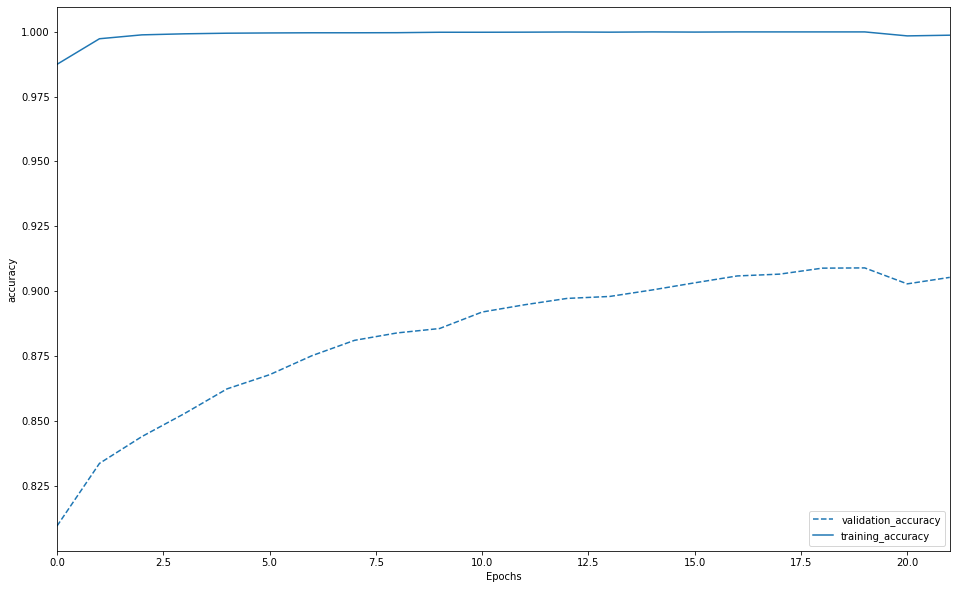

In [65]:
plot_history("accuracy",hist_3)

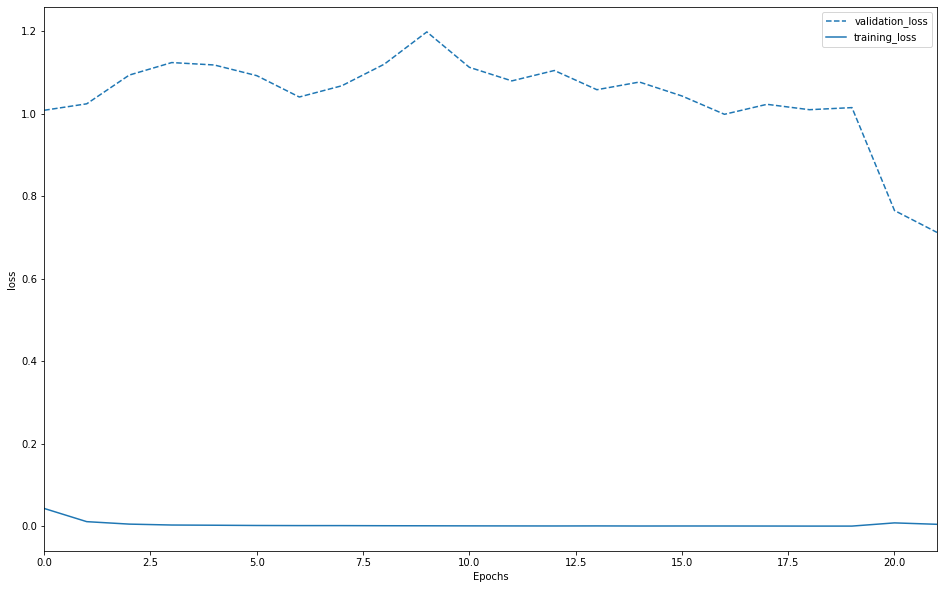

In [66]:
plot_history("loss",hist_3)

To save best model the callbacks were used.

P.S Note that when using saved h5 models you need to compile the model same way it was trained for same result

In [7]:
model_new = tf.keras.models.load_model("Ass_1_Question_5_model_4.h5")
model_new.compile(optimizer="Adam", 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

test_loss, test_acc = model_new.evaluate(resized_test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 1.0026 - accuracy: 0.9076
Test accuracy: 0.9075999855995178
